## pnlphw06
《Python自然语言分析》第5章课后习题10,20,22,36

### 10. 训练一个unigram 标注器，在一些新的文本上运行。观察有些词没有分配到标记。为什么没有？
没有标记的原因是该词并没有出现在词语料库中。

In [1]:
import nltk

In [39]:
baseline_tagger1 = nltk.UnigramTagger(brown.tagged_sents(categories='news'))

In [45]:
baseline_tagger1.tag(brown.sents(categories='fiction')[4])

[('Scotty', None),
 ('accepted', 'VBN'),
 ('the', 'AT'),
 ('decision', 'NN'),
 ('with', 'IN'),
 ('indifference', 'NN'),
 ('and', 'CC'),
 ('did', 'DOD'),
 ('not', '*'),
 ('enter', 'VB'),
 ('the', 'AT'),
 ('arguments', 'NNS'),
 ('.', '.')]

In [46]:
baseline_tagger1.evaluate(brown.tagged_sents(categories='fiction'))

0.7994685200327064

### 20. 编写代码，搜索布朗语料库，根据标记查找特定的词和短语，回答下列问题：

a. 产生一个标注为MD（情态动词） 的不同的词的按字母顺序排序的列表。  
b. 识别可能是复数名词（NNS）或第三人称单数动词（VBZ）的词（如deals，flies）。  
c. 识别三个词的介词短语形式IN + DET + NN（如in the lab ）。  
d. 男性与女性代词的比例是多少？  

In [48]:
tagged_words = brown.tagged_words()

In [50]:
#a. 产生一个标注为MD（情态动词） 的不同的词的按字母顺序排序的列表。
list1 = sorted(list({i[0].lower() for i in tagged_words if i[1]=='MD'}))
list1

["c'n",
 'can',
 'colde',
 'could',
 'dare',
 'kin',
 'maht',
 'mai',
 'may',
 'maye',
 'mayst',
 'might',
 'must',
 'need',
 'ought',
 'shall',
 'should',
 'shuld',
 'shulde',
 'wil',
 'will',
 'wilt',
 'wod',
 'wold',
 'wolde',
 'would']

In [53]:
#b. 识别可能是复数名词（NNS）或第三人称单数动词（VBZ）的词（如deals，flies）。
cfd = nltk.ConditionalFreqDist(tagged_words)

In [55]:
list(cfd.items())[:5]

[('The', FreqDist({'AT': 6725, 'AT-TL': 452, 'AT-HL': 81})),
 ('Fulton', FreqDist({'NP-TL': 10, 'NP': 7})),
 ('County', FreqDist({'NN-TL': 82, 'NN': 3})),
 ('Grand', FreqDist({'JJ-TL': 15, 'FW-JJ-TL': 3})),
 ('Jury', FreqDist({'NN-TL': 3, 'NN': 1}))]

In [56]:
l1 = list()
for k,v in list(cfd.items()):
    if 'NNS' in v and 'VBZ' in v:
        l1.append(k)
l1

['reports',
 'practices',
 'steps',
 'services',
 'costs',
 'influences',
 'matters',
 'petitions',
 'says',
 'names',
 'starts',
 'courts',
 'contracts',
 'plans',
 'raises',
 'votes',
 'calls',
 'protests',
 'rules',
 'questions',
 'means',
 'permits',
 'accounts',
 'banks',
 'faces',
 'acts',
 'needs',
 'places',
 'subjects',
 'holds',
 'causes',
 'projects',
 'amounts',
 'aids',
 'demands',
 'requests',
 'benefits',
 'figures',
 'stays',
 'states',
 'lines',
 'changes',
 'powers',
 'points',
 'forces',
 'moves',
 'attacks',
 'hopes',
 'excuses',
 'feeds',
 'stems',
 'drifts',
 'urges',
 'views',
 'times',
 'favors',
 'increases',
 'remains',
 'issues',
 'uses',
 'looks',
 'stands',
 'results',
 'fits',
 'credits',
 'signs',
 'lives',
 'terms',
 'visits',
 'talks',
 'remarks',
 'reasons',
 'works',
 'estimates',
 'factors',
 'records',
 'keeps',
 'ranks',
 'Reports',
 'flows',
 'stresses',
 'charges',
 'rates',
 'houses',
 'dogs',
 'replies',
 'bites',
 'bridges',
 'fractures',
 'se

In [57]:
dict(cfd.items())['calls']

FreqDist({'VBZ': 44, 'NNS': 22, 'VBZ-HL': 1, 'NIL': 1})

In [76]:
#c. 识别三个词的介词短语形式IN + DET + NN（如in the lab ）。
tagged_sents = brown.tagged_sents()

In [77]:
tagged_sents

[[('The', 'AT'), ('Fulton', 'NP-TL'), ('County', 'NN-TL'), ('Grand', 'JJ-TL'), ('Jury', 'NN-TL'), ('said', 'VBD'), ('Friday', 'NR'), ('an', 'AT'), ('investigation', 'NN'), ('of', 'IN'), ("Atlanta's", 'NP$'), ('recent', 'JJ'), ('primary', 'NN'), ('election', 'NN'), ('produced', 'VBD'), ('``', '``'), ('no', 'AT'), ('evidence', 'NN'), ("''", "''"), ('that', 'CS'), ('any', 'DTI'), ('irregularities', 'NNS'), ('took', 'VBD'), ('place', 'NN'), ('.', '.')], [('The', 'AT'), ('jury', 'NN'), ('further', 'RBR'), ('said', 'VBD'), ('in', 'IN'), ('term-end', 'NN'), ('presentments', 'NNS'), ('that', 'CS'), ('the', 'AT'), ('City', 'NN-TL'), ('Executive', 'JJ-TL'), ('Committee', 'NN-TL'), (',', ','), ('which', 'WDT'), ('had', 'HVD'), ('over-all', 'JJ'), ('charge', 'NN'), ('of', 'IN'), ('the', 'AT'), ('election', 'NN'), (',', ','), ('``', '``'), ('deserves', 'VBZ'), ('the', 'AT'), ('praise', 'NN'), ('and', 'CC'), ('thanks', 'NNS'), ('of', 'IN'), ('the', 'AT'), ('City', 'NN-TL'), ('of', 'IN-TL'), ('Atlant

In [60]:
from nltk.util import trigrams

In [78]:
l2 = list()
for i in tagged_sents:
    l1 = trigrams(i)
    for ii in l1:
        if ii[0][1] == 'IN' and ii[1][1] == 'DT' and ii[2][1] == 'NN':
            l2.append('{} {} {}'.format(ii[0][0],ii[1][0],ii[2][0]))
l2

['of this city',
 'of this money',
 'in each county',
 'in this county',
 'on this question',
 'in this case',
 'of that court',
 'of this court',
 'on each worker',
 'on that date',
 'for each illness',
 'for another setback',
 'on this score',
 'from another direction',
 'over this problem',
 'in this field',
 'in this matter',
 'into this campaign',
 'into this state',
 'at this time',
 'in this campaign',
 'along this thoroughfare',
 'Along this avenue',
 'for each joint',
 'during that time',
 'with this challenge',
 'In this light',
 'of this hour',
 'with each start',
 'during each practice',
 'by that time',
 'for this city',
 'of that stroke',
 'on that milestone',
 'of each month',
 'For that matter',
 'for this group',
 'of that country',
 'from this pair',
 'of this column',
 'at this point',
 'of this phase',
 'of this phase',
 'in this class',
 'in each area',
 'In another attack',
 'within that span',
 'of each month',
 'in this conspiracy',
 'for another year',
 'of eac

In [84]:
#d. 男性与女性代词的比例是多少？
fd = nltk.FreqDist([i.lower() for i in brown.words()])
fd

FreqDist({'the': 69971, ',': 58334, '.': 49346, 'of': 36412, 'and': 28853, 'to': 26158, 'a': 23195, 'in': 21337, 'that': 10594, 'is': 10109, ...})

In [86]:
ratio = (fd['he']+fd['him'])/(fd['she']+fd['her'])
'男性与女性代词的比例是{}'.format(ratio)

'男性与女性代词的比例是2.0636024423337855'

### 22. 定义可以用来做生词的回退标注器的regexp_tagger。这个标注器只检查基数词。

通过特定的前缀或后缀字符串进行测试，它应该能够猜测其他标记。例如：我们可以标注所有-s 结尾的词为复数名词。定义一个正则表达式标注器（使用RegexpTagger()），测试至少5 个单词拼写的其他模式。（使用内联文档解释规则。）

In [87]:
#正则表达式标注器
patterns = [
    (r'.*ing$', 'VBG'), # gerunds
    (r'.*ed$', 'VBD'), # simple past
    (r'.*es$', 'VBZ'), # 3rd singular present
    (r'.*ould$', 'MD'), # modals
    (r'.*\'s$', 'NN$'), # possessive nouns
    (r'.*s$', 'NNS'), # plural nouns
    (r'^-?[0-9]+(.[0-9]+)?$', 'CD'), # cardinal numbers
    (r'.*', 'NN') # nouns (default)
]
regexp_tagger = nltk.RegexpTagger(patterns)
regexp_tagger.tag(brown.sents()[3])

[('``', 'NN'),
 ('Only', 'NN'),
 ('a', 'NN'),
 ('relative', 'NN'),
 ('handful', 'NN'),
 ('of', 'NN'),
 ('such', 'NN'),
 ('reports', 'NNS'),
 ('was', 'NNS'),
 ('received', 'VBD'),
 ("''", 'NN'),
 (',', 'NN'),
 ('the', 'NN'),
 ('jury', 'NN'),
 ('said', 'NN'),
 (',', 'NN'),
 ('``', 'NN'),
 ('considering', 'VBG'),
 ('the', 'NN'),
 ('widespread', 'NN'),
 ('interest', 'NN'),
 ('in', 'NN'),
 ('the', 'NN'),
 ('election', 'NN'),
 (',', 'NN'),
 ('the', 'NN'),
 ('number', 'NN'),
 ('of', 'NN'),
 ('voters', 'NNS'),
 ('and', 'NN'),
 ('the', 'NN'),
 ('size', 'NN'),
 ('of', 'NN'),
 ('this', 'NNS'),
 ('city', 'NN'),
 ("''", 'NN'),
 ('.', 'NN')]

### 36. 创建一个正则表达式标注器和各种unigram 以及n-gram 标注器，包括回退，在布朗语料库上训练它们。

a. 创建这些标注器的3 种不同组合。测试每个组合标注器的准确性。哪种组合效果最好？  
b. 尝试改变训练语料的规模。它是如何影响你的结果的？  
可见，在增大语料库的规模后，标注的准确率有了显著的提高。

In [88]:
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')
#分离训练与测试数据
size = int(len(brown_tagged_sents) * 0.9)
print( size)#4160
train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]
#正则表达式标注器
patterns = [
    (r'.*ing$', 'VBG'), # gerunds
    (r'.*ed$', 'VBD'), # simple past
    (r'.*es$', 'VBZ'), # 3rd singular present
    (r'.*ould$', 'MD'), # modals
    (r'.*\'s$', 'NN$'), # possessive nouns
    (r'.*s$', 'NNS'), # plural nouns
    (r'^-?[0-9]+(.[0-9]+)?$', 'CD'), # cardinal numbers
    (r'.*', 'NN') # nouns (default)
]
regexp_tagger = nltk.RegexpTagger(patterns)
regexp_tagger.evaluate(test_sents)#0.2047244094488189

4160


0.2047244094488189

In [89]:
unigram_tagger = nltk.UnigramTagger(train_sents)
unigram_tagger.evaluate(test_sents)#0.8129173726701884

0.8121200039868434

In [90]:
#一般N-gram标注
bigram_tagger = nltk.BigramTagger(train_sents)
bigram_tagger.evaluate(test_sents)#0.10286056015150005

0.10206319146815508

In [91]:
#组合标注器1
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents, backoff=t1)
t2.evaluate(test_sents)#0.8463071862852587

0.8452108043456593

In [92]:
#组合标注器2
t0 = nltk.RegexpTagger(patterns)
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents, backoff=t1)
t2.evaluate(test_sents)#0.8676367985647364

0.866540416625137

In [93]:
#b. 尝试改变训练语料的规模。它是如何影响你的结果的？
brown_tagged_sents = brown.tagged_sents()
brown_sents = brown.sents()
#分离训练与测试数据
size = int(len(brown_tagged_sents) * 0.9)
print( size)#51606
train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]
#组合标注器1
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents, backoff=t1)
t2.evaluate(test_sents)#0.9132666960038558

51606


0.9125751765470128

In [ ]:
#组合标注器2
t0 = nltk.RegexpTagger(patterns)
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents, backoff=t1)
t2.evaluate(test_sents)#0.9174682005825527

### 9.挑选两个文本，研究它们之间在词汇、词汇丰富性、文体等方面的差异。你能找出几个在这两个文本中词意相当不同的词吗？例如：在《白鲸记》与《理智与情感》中的monstrous。

In [54]:
from nltk.corpus import brown

In [62]:
#文体差异
brown.categories(fileids=['ca01']),brown.categories(fileids=['cb25'])

(['news'], ['editorial'])

In [64]:
#词汇长度
len(brown.words(fileids='ca01')),len(brown.words(fileids='cb25'))

(2242, 2368)

In [65]:
#词汇丰富度
len(brown.words(fileids='ca01'))/len(set(brown.words(fileids='ca01')))

2.643867924528302

In [66]:
#词汇丰富度
len(brown.words(fileids='cb25'))/len(set(brown.words(fileids='cb25')))

2.72183908045977

In [52]:
from nltk.corpus import brown
cfd = nltk.ConditionalFreqDist(
     (genre, word)
     for genre in brown.categories()
     for word in brown.words(categories=genre))
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfd.tabulate(conditions=genres, samples=modals)

                  can could   may might  must  will 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        hobbies   268    58   131    22    83   264 
science_fiction    16    49     4    12     8    16 
        romance    74   193    11    51    45    43 
          humor    16    30     8     8     9    13 


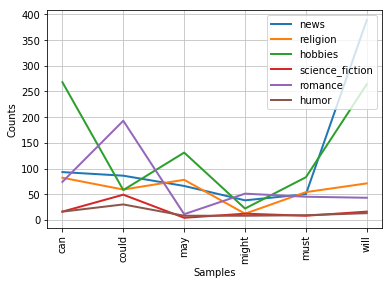

In [53]:
cfd.plot(conditions=genres, samples=modals)

### 15.写一个程序，找出所有在布朗语料库中出现至少3 次的词。

In [67]:
from nltk.corpus import brown

In [75]:
fdist = nltk.FreqDist([w.lower() for w in brown.words()])

In [76]:
count = 0
l = fdist.most_common()[::-1]
for (a,b) in l:
    if b>2:
        break
    count += 1
#至少3 次的词
w = [a for (a,b) in l[count:]]
len(w)

20615

### 17.写一个函数，找出一个文本中最常出现的50 个词，停用词除外。

In [85]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
#扩充停用词
ap = [',','.','"',';','."',',"','--','-','!','?"','.--',"'",';--','!--','?']
stopwords.extend(ap)

In [86]:
def most_common_words(text, n):
    content = [w for w in text if w.lower() not in stopwords]
    fdist = nltk.FreqDist(content)
    return(fdist.most_common(n))

In [87]:
#测试
print(most_common_words(nltk.corpus.gutenberg.words('austen-sense.txt'),50))

[('Elinor', 684), ('could', 568), ('Marianne', 566), ('Mrs', 530), ('would', 507), ('said', 397), ('every', 361), ('one', 304), ('much', 287), ('sister', 282), ('must', 279), ('Edward', 262), ('mother', 258), ('Dashwood', 252), ('time', 237), ('know', 230), ('Jennings', 230), ('might', 215), ('Willoughby', 215), ('think', 209), ('Miss', 208), ('though', 204), ('well', 191), ('thing', 185), ('Lucy', 185), ('never', 184), ('soon', 180), ('Mr', 178), ('see', 173), ('Colonel', 173), ('without', 171), ('nothing', 170), ('ever', 169), ('may', 169), ('good', 166), ('John', 163), ('first', 160), ('say', 160), ('house', 159), ('little', 158), ('day', 150), ('great', 149), ('two', 145), ('however', 145), ('Brandon', 144), ('make', 140), ('made', 138), ('sure', 134), ('Ferrars', 129), ('heart', 127)]


## end

## end

## end

## end